<a href="https://colab.research.google.com/github/YopaNelly/AI-ML-Basics/blob/main/Week_3_Crime_in_Yaounde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kneed

In [ ]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.utils import shuffle

In [ ]:
df = pd.read_csv("crime_data_yaounde.csv")

In [ ]:
df

,crime_type,location,time_of_day,number_of_offenders,number_of_victims,weapon_used,property_damage,crime_solved
0,vandalism,Nlongkak,night,1,2,no,low,no
1,drug-related,Nlongkak,evening,3,3,yes,NaN,no
2,burglary,Bastos,evening,2,1,yes,medium,yes
3,drug-related,Nlongkak,afternoon,2,2,no,high,yes
4,drug-related,Etoudi,evening,3,3,no,medium,no
...,...,...,...,...,...,...,...,...
99995,public disorder,Etoudi,night,3,1,no,NaN,no
99996,drug-related,Central,morning,5,1,yes,none,no
99997,vandalism,Central,evening,5,1,no,high,no
99998,theft,Nlongkak,afternoon,-1,0,no,high,Non


In [ ]:
df.shape

(100000, 8)

In [ ]:
df.isnull().sum()

,0
crime_type,0
location,0
time_of_day,0
number_of_offenders,0
number_of_victims,0
weapon_used,0
property_damage,10000
crime_solved,0


In [ ]:
df.describe()

,number_of_offenders,number_of_victims
count,100000.00000,100000.00000
mean,2.59957,1.25173
std,1.80071,1.29873
min,-1.00000,-1.00000
25%,1.00000,0.00000
50%,3.00000,1.00000
75%,4.00000,2.00000
max,5.00000,3.00000


In [ ]:
# find the number of raws with negative values

(df[["number_of_offenders", "number_of_victims"]] < 0).sum()


,0
number_of_offenders,10000
number_of_victims,10000


In [ ]:
df["number_of_victims"].unique()


array([ 2,  3,  1,  0, -1])

In [ ]:
df["number_of_offenders"].unique()

array([ 1,  3,  2,  5,  4, -1])

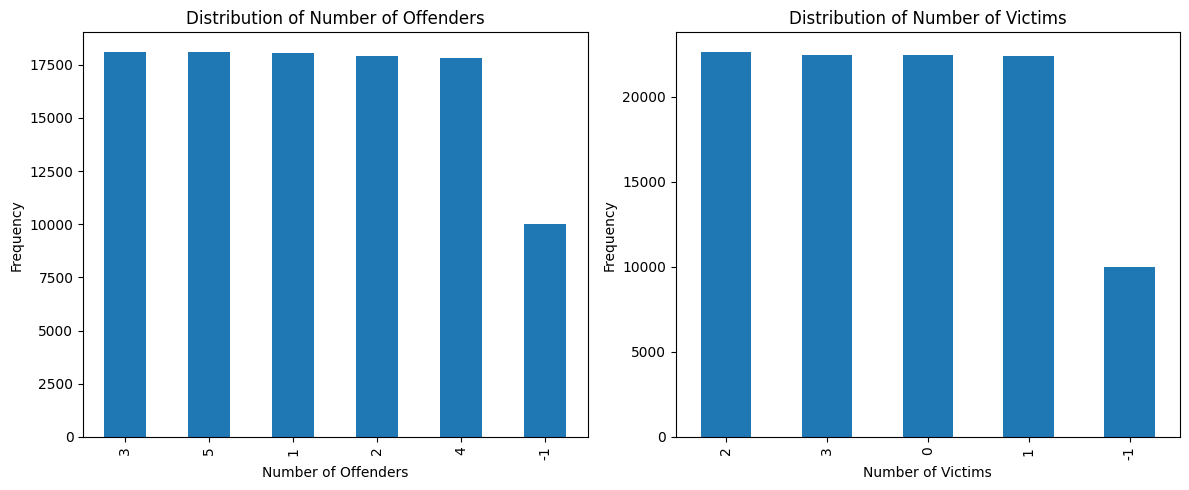

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart for number_of_offenders
df['number_of_offenders'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Distribution of Number of Offenders')
axes[0].set_xlabel('Number of Offenders')
axes[0].set_ylabel('Frequency')

# Bar chart for number_of_victims
df['number_of_victims'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Distribution of Number of Victims')
axes[1].set_xlabel('Number of Victims')
axes[1].set_ylabel('Frequency')

# Adjust layout and display
plt.tight_layout()
plt.show()


In [ ]:
df["property_damage"].unique()


array(['low', nan, 'medium', 'high', 'none'], dtype=object)

In [ ]:
df["property_damage"].mode()

,property_damage
0,high


In [ ]:
# conver -1 in number_of_offenders	number_of_victims  to nan values

df[['number_of_offenders', 'number_of_victims']] = df[['number_of_offenders', 'number_of_victims']].replace(-1, np.nan)


In [ ]:
df.describe()

,number_of_offenders,number_of_victims
count,90000.000000,90000.000000
mean,2.999522,1.501922
std,1.415348,1.117203
min,1.000000,0.000000
25%,2.000000,1.000000
50%,3.000000,2.000000
75%,4.000000,2.000000
max,5.000000,3.000000


In [ ]:
df.isnull().sum()

,0
crime_type,0
location,0
time_of_day,0
number_of_offenders,10000
number_of_victims,10000
weapon_used,0
property_damage,10000
crime_solved,0


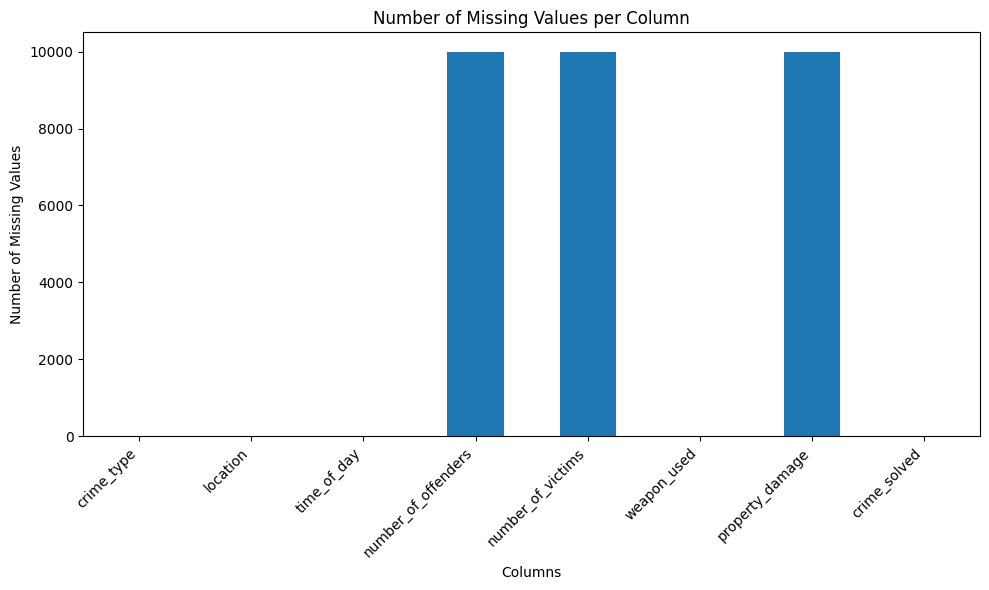

In [ ]:
# draw a bar chart graph to visialise the nan values in the df

# Calculate the number of missing values for each column
missing_values = df.isnull().sum()

# Create a bar chart
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Number of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


In [ ]:
df.head()

,crime_type,location,time_of_day,number_of_offenders,number_of_victims,weapon_used,property_damage,crime_solved
0,vandalism,Nlongkak,night,1.0,2.0,no,low,no
1,drug-related,Nlongkak,evening,3.0,3.0,yes,NaN,no
2,burglary,Bastos,evening,2.0,1.0,yes,medium,yes
3,drug-related,Nlongkak,afternoon,2.0,2.0,no,high,yes
4,drug-related,Etoudi,evening,3.0,3.0,no,medium,no


In [ ]:
# replace the nan in number_of_offenders	 and number_of_victims  with the mean value

df['number_of_offenders'].fillna(df['number_of_offenders'].mean().round(), inplace=True)
df['number_of_victims'].fillna(df['number_of_victims'].mean().round(), inplace=True)


In [ ]:

# Fill missing values in 'property_damage' with the mode
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])


In [ ]:
df.describe()

,number_of_offenders,number_of_victims
count,100000.000000,100000.000000
mean,2.999570,1.551730
std,1.342717,1.070353
min,1.000000,0.000000
25%,2.000000,1.000000
50%,3.000000,2.000000
75%,4.000000,2.000000
max,5.000000,3.000000


In [ ]:
df.dtypes

,0
crime_type,object
location,object
time_of_day,object
number_of_offenders,float64
number_of_victims,float64
weapon_used,object
property_damage,object
crime_solved,object


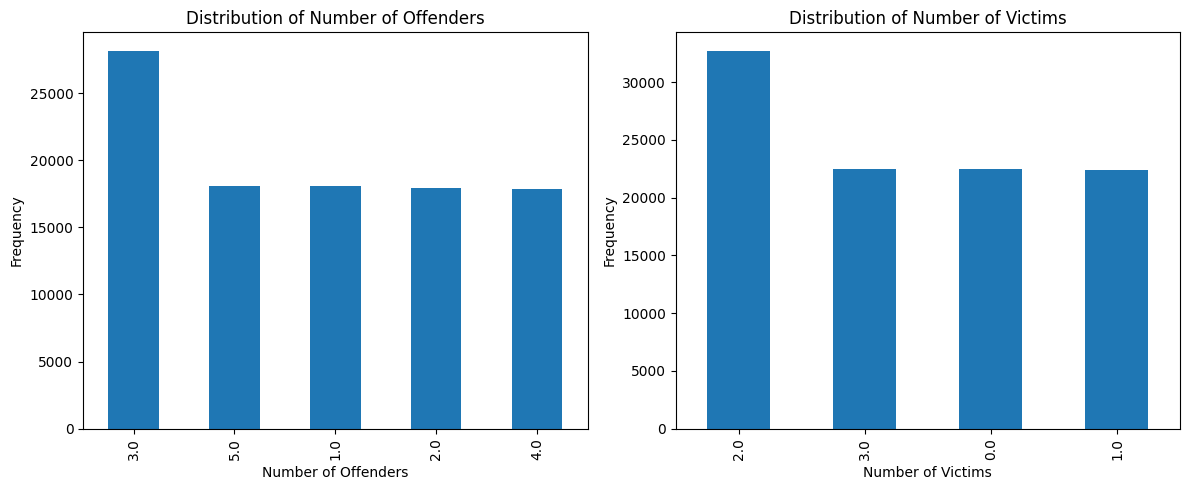

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart for number_of_offenders
df['number_of_offenders'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Distribution of Number of Offenders')
axes[0].set_xlabel('Number of Offenders')
axes[0].set_ylabel('Frequency')

# Bar chart for number_of_victims
df['number_of_victims'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Distribution of Number of Victims')
axes[1].set_xlabel('Number of Victims')
axes[1].set_ylabel('Frequency')

# Adjust layout and display
plt.tight_layout()
plt.show()


In [ ]:
df.isnull().sum()

,0
crime_type,0
location,0
time_of_day,0
number_of_offenders,0
number_of_victims,0
weapon_used,0
property_damage,0
crime_solved,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   crime_type           100000 non-null  object 
 1   location             100000 non-null  object 
 2   time_of_day          100000 non-null  object 
 3   number_of_offenders  100000 non-null  float64
 4   number_of_victims    100000 non-null  float64
 5   weapon_used          100000 non-null  object 
 6   property_damage      100000 non-null  object 
 7   crime_solved         100000 non-null  object 
dtypes: float64(2), object(6)
memory usage: 6.1+ MB


In [ ]:
df

,crime_type,location,time_of_day,number_of_offenders,number_of_victims,weapon_used,property_damage,crime_solved
0,vandalism,Nlongkak,night,1.0,2.0,no,low,no
1,drug-related,Nlongkak,evening,3.0,3.0,yes,high,no
2,burglary,Bastos,evening,2.0,1.0,yes,medium,yes
3,drug-related,Nlongkak,afternoon,2.0,2.0,no,high,yes
4,drug-related,Etoudi,evening,3.0,3.0,no,medium,no
...,...,...,...,...,...,...,...,...
99995,public disorder,Etoudi,night,3.0,1.0,no,high,no
99996,drug-related,Central,morning,5.0,1.0,yes,none,no
99997,vandalism,Central,evening,5.0,1.0,no,high,no
99998,theft,Nlongkak,afternoon,3.0,0.0,no,high,Non


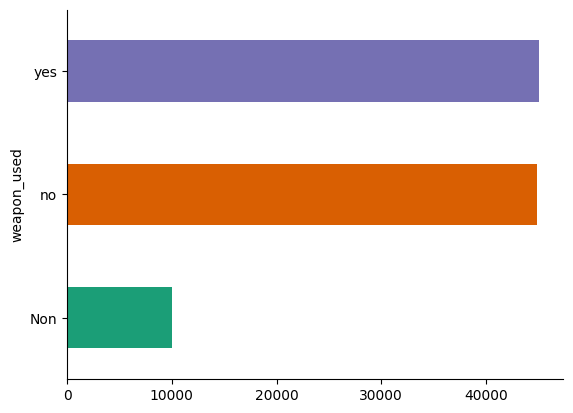

In [ ]:
# @title weapon_used

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('weapon_used').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.loc("crime_solved" == "Non")

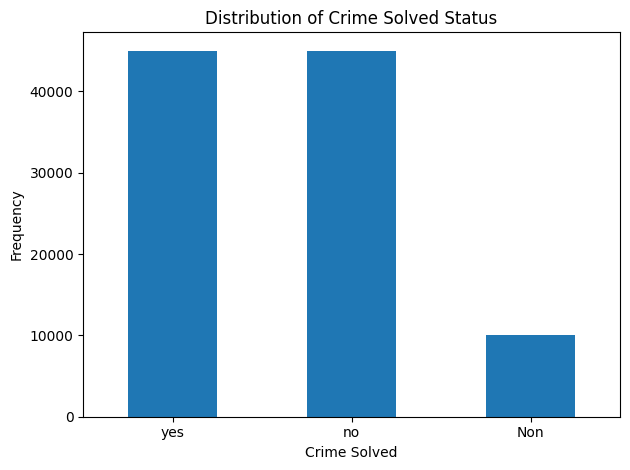

In [ ]:

# Bar chart for crime_solved
df['crime_solved'].value_counts().plot(kind='bar')
plt.title('Distribution of Crime Solved Status')
plt.xlabel('Crime Solved')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()


In [ ]:
df["crime_solved"].replace("Non", "no", inplace=True)

In [ ]:
df["weapon_used"].replace("Non", "no", inplace=True)

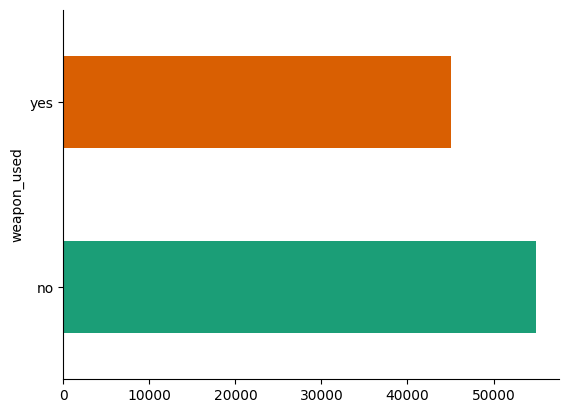

In [ ]:
# Bar chart for weapon_used

df.groupby('weapon_used').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)


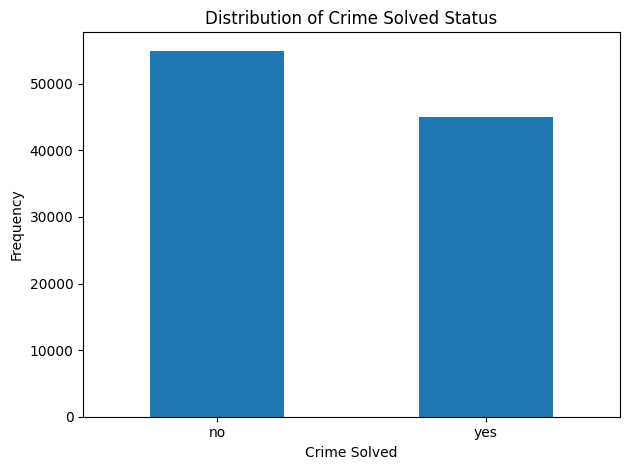

In [ ]:

# Bar chart for crime_solved
df['crime_solved'].value_counts().plot(kind='bar')
plt.title('Distribution of Crime Solved Status')
plt.xlabel('Crime Solved')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

In [ ]:
df

,crime_type,location,time_of_day,number_of_offenders,number_of_victims,weapon_used,property_damage,crime_solved
0,vandalism,Nlongkak,night,1.0,2.0,no,low,no
1,drug-related,Nlongkak,evening,3.0,3.0,yes,high,no
2,burglary,Bastos,evening,2.0,1.0,yes,medium,yes
3,drug-related,Nlongkak,afternoon,2.0,2.0,no,high,yes
4,drug-related,Etoudi,evening,3.0,3.0,no,medium,no
...,...,...,...,...,...,...,...,...
99995,public disorder,Etoudi,night,3.0,1.0,no,high,no
99996,drug-related,Central,morning,5.0,1.0,yes,none,no
99997,vandalism,Central,evening,5.0,1.0,no,high,no
99998,theft,Nlongkak,afternoon,3.0,0.0,no,high,no


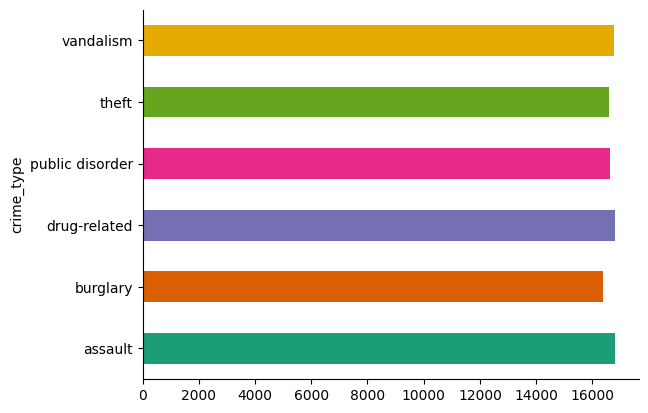

In [ ]:
# @title crime_type

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('crime_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

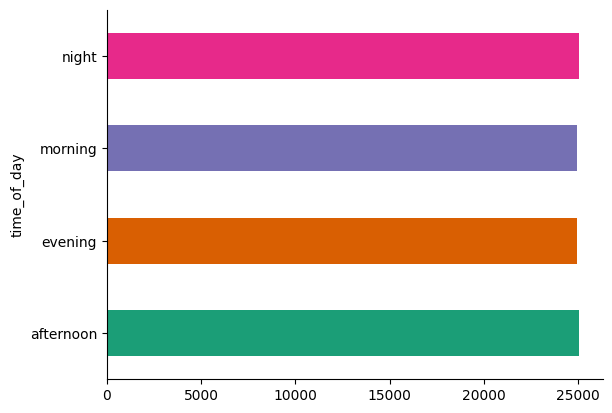

In [ ]:
# @title time_of_day

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('time_of_day').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

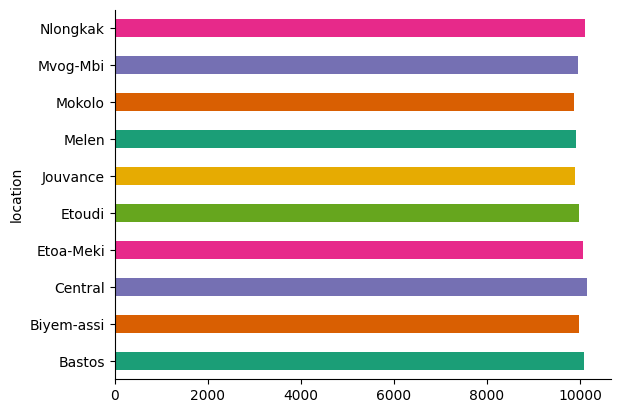

In [ ]:

# Bar chart for location
df.groupby('location').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)


In [ ]:
df["crime_type"].unique()


array(['vandalism', 'drug-related', 'burglary', 'assault',
       'public disorder', 'theft'], dtype=object)

In [ ]:
df["location"].unique()


array(['Nlongkak', 'Bastos', 'Etoudi', 'Etoa-Meki', 'Jouvance',
       'Biyem-assi', 'Melen', 'Mokolo', 'Mvog-Mbi', 'Central'],
      dtype=object)

In [ ]:
df["time_of_day"].unique()

array(['night', 'evening', 'afternoon', 'morning'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   crime_type           100000 non-null  object 
 1   location             100000 non-null  object 
 2   time_of_day          100000 non-null  object 
 3   number_of_offenders  100000 non-null  float64
 4   number_of_victims    100000 non-null  float64
 5   weapon_used          100000 non-null  object 
 6   property_damage      100000 non-null  object 
 7   crime_solved         100000 non-null  object 
dtypes: float64(2), object(6)
memory usage: 6.1+ MB


In [ ]:

# Convert object columns to category and then to numerical codes
for col in df.select_dtypes(include=['object']):
  df[col] = df[col].astype('category')
  df[col] = df[col].cat.codes

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   crime_type           100000 non-null  int8   
 1   location             100000 non-null  int8   
 2   time_of_day          100000 non-null  int8   
 3   number_of_offenders  100000 non-null  float64
 4   number_of_victims    100000 non-null  float64
 5   weapon_used          100000 non-null  int8   
 6   property_damage      100000 non-null  int8   
 7   crime_solved         100000 non-null  int8   
dtypes: float64(2), int8(6)
memory usage: 2.1 MB


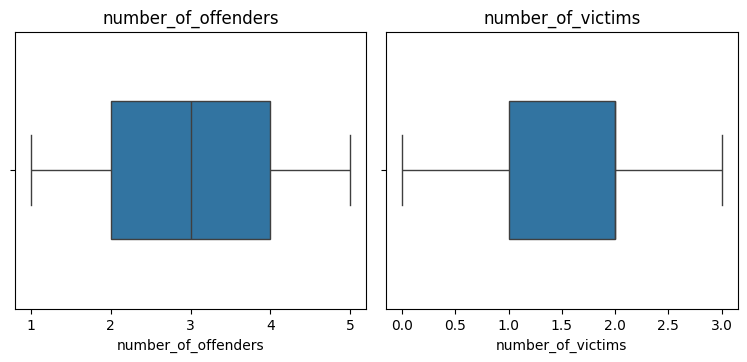

In [ ]:
# Create box plots for each column
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=np.number).columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=df[column], orient='h', width=0.5)  # Horizontal boxplot with reduced width
    plt.title(column)

plt.tight_layout()
plt.show()


In [ ]:
df

,crime_type,location,time_of_day,number_of_offenders,number_of_victims,weapon_used,property_damage,crime_solved
0,vandalism,Nlongkak,night,1.0,2.0,no,low,no
1,drug-related,Nlongkak,evening,3.0,3.0,yes,high,no
2,burglary,Bastos,evening,2.0,1.0,yes,medium,yes
3,drug-related,Nlongkak,afternoon,2.0,2.0,no,high,yes
4,drug-related,Etoudi,evening,3.0,3.0,no,medium,no
...,...,...,...,...,...,...,...,...
99995,public disorder,Etoudi,night,3.0,1.0,no,high,no
99996,drug-related,Central,morning,5.0,1.0,yes,none,no
99997,vandalism,Central,evening,5.0,1.0,no,high,no
99998,theft,Nlongkak,afternoon,3.0,0.0,no,high,no


In [ ]:
df.describe()

,number_of_offenders,number_of_victims
count,100000.000000,100000.000000
mean,2.999570,1.551730
std,1.342717,1.070353
min,1.000000,0.000000
25%,2.000000,1.000000
50%,3.000000,2.000000
75%,4.000000,2.000000
max,5.000000,3.000000


from matplotlib import pyplot as plt
_df_0['number_of_offenders'].plot(kind='hist', bins=20, title='number_of_offenders')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['number_of_victims'].plot(kind='hist', bins=20, title='number_of_victims')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='number_of_offenders', y='number_of_victims', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['number_of_offenders'].plot(kind='line', figsize=(8, 4), title='number_of_offenders')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['number_of_victims'].plot(kind='line', figsize=(8, 4), title='number_of_victims')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.dtypes

,0
crime_type,object
location,object
time_of_day,object
number_of_offenders,float64
number_of_victims,float64
weapon_used,object
property_damage,object
crime_solved,object


In [ ]:

# Convert object columns to category and then to numerical codes
for col in df.select_dtypes(include=['object']):
  df[col] = df[col].astype('category')
  df[col] = df[col].cat.codes

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   crime_type           100000 non-null  int8   
 1   location             100000 non-null  int8   
 2   time_of_day          100000 non-null  int8   
 3   number_of_offenders  100000 non-null  float64
 4   number_of_victims    100000 non-null  float64
 5   weapon_used          100000 non-null  int8   
 6   property_damage      100000 non-null  int8   
 7   crime_solved         100000 non-null  int8   
dtypes: float64(2), int8(6)
memory usage: 2.1 MB


In [ ]:
# Scale the dataset
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df.describe()


,crime_type,location,time_of_day,number_of_offenders,number_of_victims,weapon_used,property_damage,crime_solved
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05
mean,-3.332445e-17,-3.050005e-17,3.375078e-19,-3.737455e-17,-4.153122e-17,9.734435e-18,2.986056e-17,-9.372059e-17
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-1.462897e+00,-1.560620e+00,-1.340535e+00,-1.489205e+00,-1.449744e+00,-9.064178e-01,-1.167528e+00,-9.048264e-01
25%,-8.781055e-01,-8.654944e-01,-1.340535e+00,-7.444423e-01,-5.154681e-01,-9.064178e-01,-1.167528e+00,-9.048264e-01
50%,2.914777e-01,-1.703684e-01,-4.467436e-01,3.202479e-04,4.188079e-01,-9.064178e-01,-3.009979e-01,-9.048264e-01
75%,8.762692e-01,8.723205e-01,1.340839e+00,7.450828e-01,4.188079e-01,1.103244e+00,5.655321e-01,1.105184e+00
max,1.461061e+00,1.567447e+00,1.340839e+00,1.489845e+00,1.353084e+00,1.103244e+00,1.432062e+00,1.105184e+00


from matplotlib import pyplot as plt
_df_5['crime_type'].plot(kind='hist', bins=20, title='crime_type')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['location'].plot(kind='hist', bins=20, title='location')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['time_of_day'].plot(kind='hist', bins=20, title='time_of_day')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['number_of_offenders'].plot(kind='hist', bins=20, title='number_of_offenders')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='crime_type', y='location', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='location', y='time_of_day', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='time_of_day', y='number_of_offenders', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12.plot(kind='scatter', x='number_of_offenders', y='number_of_victims', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_of_day']
  ys = series['crime_type']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('time_of_day', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_of_day')
_ = plt.ylabel('crime_type')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_of_day']
  ys = series['location']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('time_of_day', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_of_day')
_ = plt.ylabel('location')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_of_day']
  ys = series['number_of_offenders']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('time_of_day', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_of_day')
_ = plt.ylabel('number_of_offenders')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_of_day']
  ys = series['number_of_victims']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_16.sort_values('time_of_day', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_of_day')
_ = plt.ylabel('number_of_victims')

from matplotlib import pyplot as plt
_df_17['crime_type'].plot(kind='line', figsize=(8, 4), title='crime_type')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['location'].plot(kind='line', figsize=(8, 4), title='location')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['time_of_day'].plot(kind='line', figsize=(8, 4), title='time_of_day')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_20['number_of_offenders'].plot(kind='line', figsize=(8, 4), title='number_of_offenders')
plt.gca().spines[['top', 'right']].set_visible(False)

Apply PCA to the MNIST dataset again

In [ ]:
# Principal Component Analysis
from sklearn.decomposition import PCA
n_components = 3
whiten = False
random_state = 24
pca = PCA(n_components=n_components, whiten=whiten, \
random_state=random_state)
X_train_PCA = pca.fit_transform(df)

In [ ]:
X_train_PCA

array([[ 0.3746083 , -0.24069134,  0.49397827],
       [ 1.03406361, -0.58060297, -1.69899684],
       [ 0.4945026 ,  0.13920243,  1.18599705],
       ...,
       [-1.19894387,  0.75957146,  0.1929895 ],
       [-0.38285084, -1.43126989, -0.30653915],
       [-1.20818296,  0.57700238,  0.64544215]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

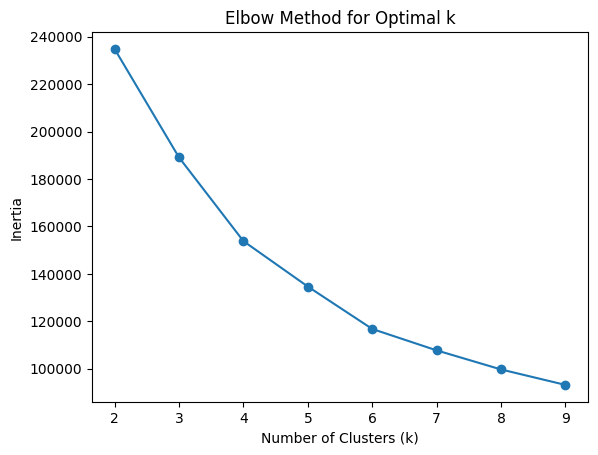

In [ ]:

# Calculate inertia for different values of k
inertia = []
for i in range(2, 10):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(X_train_PCA)
  inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(2, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [ ]:
# k-means - Inertia as the number of clusters varies
from sklearn.cluster import KMeans
n_clusters = 6
n_init = 1
max_iter = 300
random_state = 24

kMeans_inertia = pd.DataFrame(data=[],index=range(2,21),
columns=['inertia'])
for n_clusters in range(2,21):
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init,
    max_iter=max_iter, random_state=random_state)
    kmeans.fit(X_train_PCA)
    kMeans_inertia.loc[n_clusters] = kmeans.inertia_


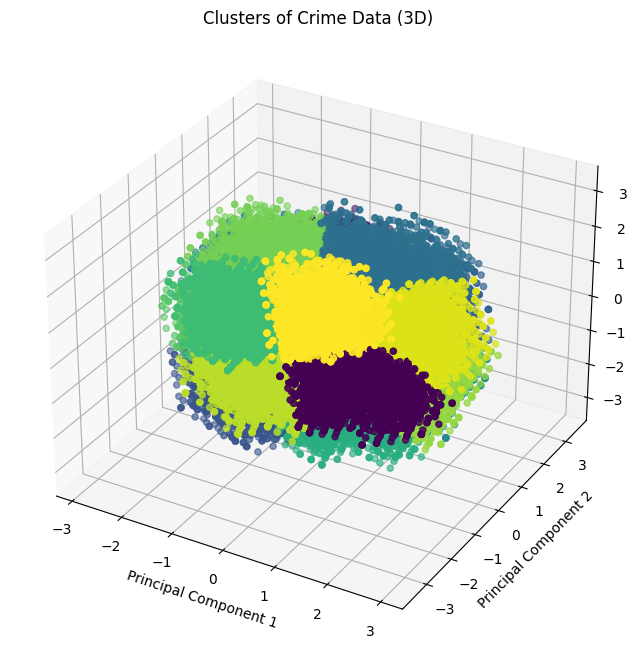

In [ ]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_PCA[:, 0], X_train_PCA[:, 1], X_train_PCA[:, 2], c=labels, cmap='viridis')
ax.set_title('Clusters of Crime Data (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
labels = dbscan.fit_predict(X_train_PCA)



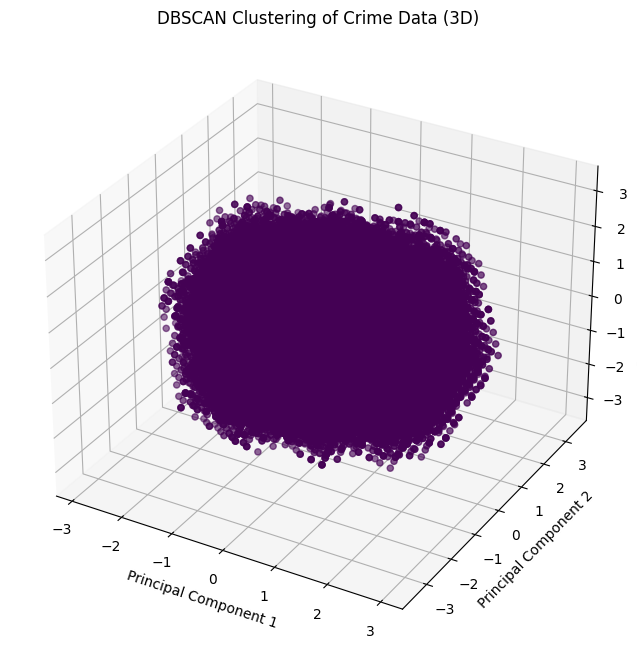

In [ ]:
# Create a 3D scatter plot for DBSCAN results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_PCA[:, 0], X_train_PCA[:, 1], X_train_PCA[:, 2], c=labels, cmap='viridis')
ax.set_title('DBSCAN Clustering of Crime Data (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()


In [ ]:
# Create a DataFrame with location and cluster labels
location_clusters = pd.DataFrame({
    'location': df['location'],
    'cluster': labels  #
})

# Group by location and get the most frequent cluster for each location
location_clusters = location_clusters.groupby('location')['cluster'].agg(lambda x: x.value_counts().index[0]).reset_index()

# Assuming you have a way to map location names to latitude and longitude
# Replace this with your actual mapping logic
location_coords = {
    'location1': (3.86667, 11.51667),
    'location2': (3.85, 11.5),
}

# Add latitude and longitude to the location_clusters DataFrame
location_clusters['latitude'] = location_clusters['location'].map(lambda x: location_coords.get(x, (None, None))[0])
location_clusters['longitude'] = location_clusters['location'].map(lambda x: location_coords.get(x, (None, None))[1])

# Filter out locations without coordinates
location_clusters = location_clusters.dropna(subset=['latitude', 'longitude'])

# Plot the clusters on a map
import folium

# Create a map centered on Yaounde
yaounde_map = folium.Map(location=[3.86667, 11.51667], zoom_start=12)

# Create a color map for the clusters
color_map = plt.cm.get_cmap('viridis', len(location_clusters['cluster'].unique()))

# Add markers for each location, colored by cluster
for _, row in location_clusters.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color_map(row['cluster']),
        fill=True,
        fill_color=color_map(row['cluster']),
        fill_opacity=0.7,
        tooltip=f"Location: {row['location']}, Cluster: {row['cluster']}"
    ).add_to(yaounde_map)

# Display the map
yaounde_map


<ipython-input-82-43d59dd3b939>:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(location_clusters['cluster'].unique()))
